# Probability and Statistics - Part 1 The Magic Coin

In this tutorial we're going to take a look at Probability and Statistics. The overall goal is to cover a lot of ground fairly quickly so that you'll get a sense of how all the pieces work in practice. Where going to start with a simple example that will demonstart the key problems behind probability and statistics.

For this first part we won't be importing any `random` library. The only tool we'll need to create randomness is:

In [1]:
import time

There is a common belief that **randomness** is **not a property of the world** but this is a misunderstanding. When we say that something is "random" we are really describing **the state of our own mind**. To explore this we'll start with a very interesting `class` called `MagicCoin`:

In [47]:
class MagicCoin:
    
    def __init__(self,n):
        self.n = n
    
    def flip(self):
        return(
            int(time.time()) % self.n == 0
        )

This `MagicCoin` may not initially seem that *magic*: all it does is take an integer `n` and than uses that determine heads (`True`) or tails (`False`) based on the current time in seconds. 

Just to make sure this simple `flip` logic makes sense. If the time now is:

In [6]:
time.time()

1571785405.5180979

then casting that to an `int` will give us:

In [7]:
int(time.time())

1571785432

..oops! time changes so quickly! But you get the point, now we have an `int` and depending on `n` we get a result of our coin toss...

In [8]:
int(time.time()) % 2

0

Okay let's just make a MagicCoin and start thinking about Probability!

Here's our coin:

In [13]:
mc = MagicCoin(2)

Now this is where notebooks are really fun! Run the next line...

In [14]:
result = mc.flip()

Don't print it yet! What is the value of `result`? The obvious answer is that "we don't know!!!" but that's not really true. 

We know that the result could either be `True` or `False`. This is a big deal because it drastically limits the realm of values that `result` could have. 

## Probability

Since we know the result can either be `True` or `False` but which is it? It turns out we can solve this problem if we extend the way we think about logic to be a bit more flexible.

In boolean logic, the logic we use every day when writing programs, we think of facts as either being `True` or `False`. In the case of our Magic coin, this is true. The value of `result` is only one of these two choices.

The problem is that we're missing information to let us know which one of the two it is. How can we express this missing information. Well we can start by thinking of :

`True` -> `1`

`False` -> `0`

So what is the values of `result`? Well if we think of being closer to `True` as being closer to `1` and being closer to `False` as being closer to `0`, then the most obvious choice here is to choose `0.5`. 

This is all that probability is: a number between 0 and 1 that represents how close to `True` or how close to `False` something is when we don't have enough information to know for sure (and we almost *never* have enough information).

There's a lot of mathematically ways we can talk about (and argue about) for exactly to chose these number, but for this tutorial most of your intuitions will be reasonably correct, and when they're not this tutorial to try to point out why.

When we look at `result` there is no more mystery, and not more probability:

In [106]:
result

False

## Logic of Probability!

Now the real power of a probability is that we can combine uncertainty with the same type of logic we do for `bool` types in programming! The rules a pretty similar with some nuance...


Notice that is all these examples if we consider `1.0` to be `True` and `0.0` to be `False` the logic is *exactly* the same.

**note:** these are slightly simplified rules that assume something called conditional independence. There is a more naunced definition of some of these used for what we call conditional probabilities. Conditional probabilities happen when knowing something about one thing tells us information about another. 

#### Logical NOT

In [25]:
not True

False

In [26]:
not False

True

#### Probabilistic NOT

$$\text{not } P(A) = 1-P(A)$$

In [27]:
1 - 1.0

0.0

In [28]:
1 - 0.0

1.0

In [30]:
1-0.25

0.75

#### Logicial AND

In [19]:
True and False

False

In [20]:
True and True

True

In [21]:
False and False

False

#### Probabilitistic AND

$$P(A \text{ and } B) = P(A) \cdot P(B) $$

In [22]:
1.0 * 1.0

1.0

In [31]:
1.0 * 0.0

0.0

In [32]:
0.0 * 0.0

0.0

In [23]:
0.5*0.5

0.25

#### Logical OR

In [34]:
True or True

True

In [35]:
True or False

True

In [36]:
False or False

False

#### Probabilistic OR

$$P(A \text{ or } B) = P(A) + P(B) - P(A) \cdot P(B) $$

Not this is a little more complicated than the others. 

In [37]:
1.0 + 1.0 - 1.0*1.0

1.0

In [38]:
1.0 + 0.0 - 1.0*0.0

1.0

In [39]:
0.0 + 0.0 - 0.0*0.0

0.0

In [40]:
0.25 + 0.3 - 0.25*0.3

0.47500000000000003

### Logic is how we reason when we are *certain* about facts
### Probability is how we reason when we are *uncertain* about the facts...

## Probability is the Logic of Uncertainity

In [41]:
mc2 = MagicCoin(3)

Now we have an baised coin. What is the probability we get `True`?

...

$$P(True)=\frac{1}{3}$$

In [42]:
results = []

In [43]:
results.append(mc2.flip())

*note:* these need to be in two seperate cells so that there is a no trivial time difference between the two

In [44]:
results.append(mc2.flip())

In [46]:
result2 = any(results)

Ah! Don't peak yet! What is the probability that `result2` is `True`?
Let's use the tools we have so far..

To begin lets list out all possible outcomes:

```
[True,True]
[False,False]
[False,True]
[True,False]

```

Okay we can use our probabilisty

The first case is easy:

`[True, True]`
$$P(\text{True and True}) = P(\text{True}) \cdot P(\text{True}) = \frac{1}{3} \cdot \frac{1}{3} = \frac{1}{9} $$

Because `False` is really the negation of `True` we know that:
$$P(\text{False}) = 1-P(\text{True})$$

So, using our logic for:

`[False,False]`

We get:

$$P(\text{not True and not True}) = (1-P(\text{True})) \cdot (1-P(\text{True})) = (1-\frac{1}{3}) \cdot (1-\frac{1}{3}) = \frac{4}{9}  $$

Finally we have two cases which should have the same probability (so we only have to solve one):

```
[True,False]
```

$$P(\text{True and not True}) = P(\text{True}) \cdot (1-P(\text{True})) = \frac{1}{3} \cdot (1-\frac{1}{3}) = \frac{2}{9}$$

Finally we can figure out the probability `any` of our results to be `True`, we can just use OR (and since these events our mutually exclusve:

$$P(\text{[True,True] OR [True, False] OR [False, True]}) = \frac{1}{9} + \frac{2}{9} + \frac{2}{9} = \frac{5}{9}$$

of course we could have also just our rules of logic a bit differently and gotten the same result:

$$P(\text{NOT [False,False]}) = 1- \frac{4}{9})$$

Now we can evaluate this:

In [48]:
result2

False

now let's try this:

In [50]:
mc3 = MagicCoin(4)

In [51]:
more_results = []

In [52]:
more_results.append(mc3.flip())

In [53]:
more_results.append(mc3.flip())

In [54]:
more_results.append(mc3.flip())

In [55]:
more_results.append(mc3.flip())

In [56]:
more_results.append(mc3.flip())

In [57]:
result3 = len([r for r in more_results if r])

Now what!

By now you should be able to see that the probability of `True` in each flip is $\frac{1}{4}$, but we have 5 results taht we didn't see. With just 2 it took quite a bit of energy to ennumerate them and think about them all but with 5 this seems a bit much!

To solve this we can use a *probability mass function* called the **Binomial Distribution**. We'll use `scipy` for this:

In [58]:
from scipy import stats

The binomial distribution takes a number of trials `n` and the probability of success `p`. So for the problem we just computed we would use `n=2` and `p=1/3`

In [68]:
my_dist = stats.binom(n=2,p=1/3)

Then we can use the `.pmf` method to compute the probability of getting `k` values of `True`:

In [76]:
my_dist.pmf(0)

0.4444444444444445

In [77]:
my_dist.pmf(1)

0.4444444444444444

In [82]:
my_dist.pmf(2)

0.11111111111111109

We can visualize this distribution as so:

In [80]:
import seaborn as sns 

Text(0.5, 1.0, 'Binomial Distribution n=2,p=1/3')

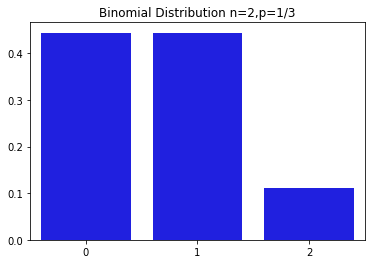

In [87]:
sns.barplot(x=[0,1,2],
            y=my_dist.pmf([0,1,2]),
            color="blue").set_title("Binomial Distribution n=2,p=1/3")

For our new problem we know that we have `n=5` and `p=1/4` ...

In [88]:
five_tosses_dist = stats.binom(n=5,p=1/4)

...and here we can see all the possible outcomes for the value of `result3`

Text(0.5, 1.0, 'Binomial Distribution for n=5,p=1/4')

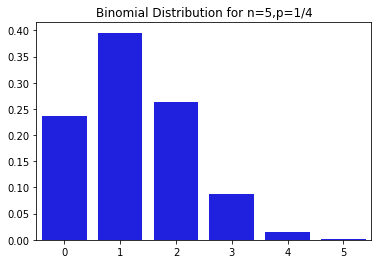

In [91]:
sns.barplot(x=[x for x in range(0,6)],
            y=five_tosses_dist.pmf([x for x in range(0,6)]),
            color='blue').set_title("Binomial Distribution for n=5,p=1/4")

Now we can easily answers all sorts of question!

What is the probability that the lenght of `result3` is exactly `1`?

In [92]:
five_tosses_dist.pmf(1)

0.39550781249999994

What is the probability that `result3` is length `2` or longer?

In [93]:
five_tosses_dist.pmf([2,3,4,5]).sum()

0.36718749999999994

Interesting! It's slightly more likely to have just one single `True` than to have 2 or more!

What about the probability that the length is even?

In [94]:
five_tosses_dist.pmf([0,2,4]).sum()

0.515625

Okay! now make a guess at what the value of `result3` is and let's look at what's really in there:

In [95]:
result3

1

## Probability and now.... STATISTICS!

You may wonder what the difference is between *probability* and *statistics*. Rather than explain if first, let's have an object lesson first:

In [96]:
truly_magical_coin = MagicCoin((int(time.time()) % 7)+1)

Okay let's play our game again!

In [97]:
magic_results = []

In [98]:
magic_results.append(truly_magical_coin.flip())

In [99]:
magic_results.append(truly_magical_coin.flip())

In [100]:
magic_results.append(truly_magical_coin.flip())

NO PEEKING! oh wait! does it even matter this time? What in the world can we expect these results to be? This coin was initialized with a value between 1 and 7 *but we don't know which one!* What do you expect the `magic_results` to be? Would `[True, True, True]` surprise you? would `[False, False, False]` surprise you?

### The difference between probability and statistics

When we are doing probability we know exactly how uncertain we are, but when we're doing statistics we don't even know that. The `truly_magical_coin` is different because we don't know how it was parameterized.

This is why *data* is so important in statistics. We can use data to *reverse engineer processes we want to know about* to estimate what our uncertainities are. 

Let's look at our `magic_results` to see if this can help us decide what's going on:

In [101]:
magic_results

[False, True, False]

Now this information will be different each time you step through this notebook. But what would `[True, True, True]` tell you about the true value of `n` that `[True, False, False]` might now?

If you get more data, can you start to make better guesses?

In [102]:
magic_results.append(truly_magical_coin.flip())

In [103]:
magic_results.append(truly_magical_coin.flip())

In [104]:
magic_results.append(truly_magical_coin.flip())

In [105]:
magic_results

[False, True, False, False, True, True]

The more we study the results of this coin the more we know about `n`... but the more we know about `n` the more we learn about what we can expect the results of this coin to be!

## HOMEWORK

Want to really understand statistics? The good news is all you really need is the `MagicCoin`. All of the other stuff we'll cover in this tutorial is just tool that we can derive from first principles from this coin. Play with this coin and try to determine what `n` is. 

- How does more data change this? 
- Are all values of `n` equally as difficult to predict? 
- What is the distribution of possible results when you have no information?
- How does this distribution change as you gather data?
- When are you confindent enough to guess `n` and feel 99% sure you have the right answer?

